In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [21]:
df = pd.read_csv('Business_Locations.csv')
df.head(10)

,business_id,name,address,city,state,latitude,longitude,stars
0,wKFF-JKmrj0k-un__fbTbw,Be Map,SW 10th Ave & SW Washington St,Portland,OR,45.521343,-122.681366,3.0
1,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0
2,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5
3,XfgeAAj9r0dRbUZYcjacgg,Dunkin',946 W State Road 436,Altamonte Springs,FL,28.664944,-81.422310,2.5
4,IuXMZPgNgjetmueLxvhYfw,Dunkin',2060 N High St,Columbus,OH,40.004190,-83.008350,4.0
5,uFwCngppzpAp8mHAvAMPIA,7-Eleven,464 Hanover St,Boston,MA,42.367092,-71.052795,3.0
6,EGLOKQocFPI7048e2uZnaA,Tim Hortons,2501 Main Street,Vancouver,BC,49.262770,-123.101400,2.5
7,J2HLXhqKWGSM5l25sbbLKA,Tart,2128 SE Division St,Portland,OR,45.504745,-122.643800,4.0
8,PgUD9lx6hrk6sQOMcaLjeg,Tim Hortons,9591 Ladner Trunk Road,Delta,BC,49.091995,-122.957850,2.5
9,eUFVJ725CSu1daOGV5efpg,Dunkin',2435 Old Canoe Creek Rd,Saint Cloud,FL,28.230228,-81.317640,2.5


In [22]:
df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

In [23]:
# Variable with the Longitude and Latitude
X=df.loc[:,['business_id','latitude','longitude']]
X.head(10)

,business_id,latitude,longitude
0,wKFF-JKmrj0k-un__fbTbw,45.521343,-122.681366
1,y2gFcAVBXmVxFXAugRe5ig,45.471070,-122.648270
2,XrrIr0HukWA5hvM62ir65g,49.194168,-123.069725
3,XfgeAAj9r0dRbUZYcjacgg,28.664944,-81.422310
4,IuXMZPgNgjetmueLxvhYfw,40.004190,-83.008350
5,uFwCngppzpAp8mHAvAMPIA,42.367092,-71.052795
6,EGLOKQocFPI7048e2uZnaA,49.262770,-123.101400
7,J2HLXhqKWGSM5l25sbbLKA,45.504745,-122.643800
8,PgUD9lx6hrk6sQOMcaLjeg,49.091995,-122.957850
9,eUFVJ725CSu1daOGV5efpg,28.230228,-81.317640


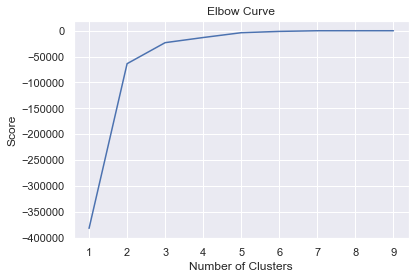

In [24]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,business_id,latitude,longitude,cluster_label
0,wKFF-JKmrj0k-un__fbTbw,45.521343,-122.681366,1
1,y2gFcAVBXmVxFXAugRe5ig,45.471070,-122.648270,1
2,XrrIr0HukWA5hvM62ir65g,49.194168,-123.069725,1
3,XfgeAAj9r0dRbUZYcjacgg,28.664944,-81.422310,0
4,IuXMZPgNgjetmueLxvhYfw,40.004190,-83.008350,0
5,uFwCngppzpAp8mHAvAMPIA,42.367092,-71.052795,2
6,EGLOKQocFPI7048e2uZnaA,49.262770,-123.101400,1
7,J2HLXhqKWGSM5l25sbbLKA,45.504745,-122.643800,1
8,PgUD9lx6hrk6sQOMcaLjeg,49.091995,-122.957850,1
9,eUFVJ725CSu1daOGV5efpg,28.230228,-81.317640,0


In [26]:
X['cluster_label'].unique()

array([1, 0, 2])

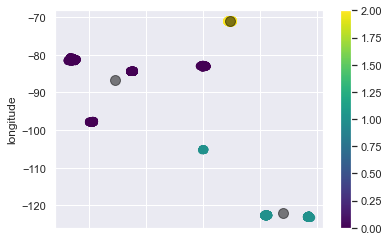

In [34]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

In [35]:
centers = kmeans.cluster_centers_
print(centers)

[[  32.26496969  -86.68173042]
 [  47.01608364 -122.04168551]
 [  42.36606526  -71.09138863]]


In [10]:
df.head(5)

,business_id,name,address,city,state,latitude,longitude,stars
0,wKFF-JKmrj0k-un__fbTbw,Be Map,SW 10th Ave & SW Washington St,Portland,OR,45.521343,-122.681366,3.0
1,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0
2,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5
3,XfgeAAj9r0dRbUZYcjacgg,Dunkin',946 W State Road 436,Altamonte Springs,FL,28.664944,-81.422310,2.5
4,IuXMZPgNgjetmueLxvhYfw,Dunkin',2060 N High St,Columbus,OH,40.004190,-83.008350,4.0


In [11]:
X.head(5)

,business_id,latitude,longitude,cluster_label
0,wKFF-JKmrj0k-un__fbTbw,45.521343,-122.681366,1
1,y2gFcAVBXmVxFXAugRe5ig,45.471070,-122.648270,1
2,XrrIr0HukWA5hvM62ir65g,49.194168,-123.069725,1
3,XfgeAAj9r0dRbUZYcjacgg,28.664944,-81.422310,0
4,IuXMZPgNgjetmueLxvhYfw,40.004190,-83.008350,0


In [12]:
X = X[['business_id','cluster_label']]
X.head(5)

,business_id,cluster_label
0,wKFF-JKmrj0k-un__fbTbw,1
1,y2gFcAVBXmVxFXAugRe5ig,1
2,XrrIr0HukWA5hvM62ir65g,1
3,XfgeAAj9r0dRbUZYcjacgg,0
4,IuXMZPgNgjetmueLxvhYfw,0


In [13]:
clustered_data = df.merge(X, left_on='business_id', right_on='business_id')
clustered_data.head(5)

,business_id,name,address,city,state,latitude,longitude,stars,cluster_label
0,wKFF-JKmrj0k-un__fbTbw,Be Map,SW 10th Ave & SW Washington St,Portland,OR,45.521343,-122.681366,3.0,1
1,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,1
2,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5,1
3,XfgeAAj9r0dRbUZYcjacgg,Dunkin',946 W State Road 436,Altamonte Springs,FL,28.664944,-81.422310,2.5,0
4,IuXMZPgNgjetmueLxvhYfw,Dunkin',2060 N High St,Columbus,OH,40.004190,-83.008350,4.0,0


In [16]:
clustered_data.to_csv ('clustered_data.csv', index=None, header = True)

In [15]:
df2 = pd.read_csv('clustered_data.csv')
df2.head(10)

,business_id,name,address,city,state,latitude,longitude,stars,cluster_label
0,wKFF-JKmrj0k-un__fbTbw,Be Map,SW 10th Ave & SW Washington St,Portland,OR,45.521343,-122.681366,3.0,1
1,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,1
2,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5,1
3,XfgeAAj9r0dRbUZYcjacgg,Dunkin',946 W State Road 436,Altamonte Springs,FL,28.664944,-81.422310,2.5,0
4,IuXMZPgNgjetmueLxvhYfw,Dunkin',2060 N High St,Columbus,OH,40.004190,-83.008350,4.0,0
5,uFwCngppzpAp8mHAvAMPIA,7-Eleven,464 Hanover St,Boston,MA,42.367092,-71.052795,3.0,2
6,EGLOKQocFPI7048e2uZnaA,Tim Hortons,2501 Main Street,Vancouver,BC,49.262770,-123.101400,2.5,1
7,J2HLXhqKWGSM5l25sbbLKA,Tart,2128 SE Division St,Portland,OR,45.504745,-122.643800,4.0,1
8,PgUD9lx6hrk6sQOMcaLjeg,Tim Hortons,9591 Ladner Trunk Road,Delta,BC,49.091995,-122.957850,2.5,1
9,eUFVJ725CSu1daOGV5efpg,Dunkin',2435 Old Canoe Creek Rd,Saint Cloud,FL,28.230228,-81.317640,2.5,0
